In [313]:
import nltk
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# nltk.download('omw-1.4')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import numpy as np
import pandas as pd


In [314]:
# download necessary NLTK resources

nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\mkroh\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mkroh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mkroh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mkroh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [315]:
# take a peek at the data

movie_reviews.words()

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]

In [316]:
total_words = len(movie_reviews.words())
print(total_words)

1583820


In [317]:
categories = movie_reviews.categories()
print(categories)

['neg', 'pos']


cool.  this is our target variable.

In [318]:
# count of each word

nltk.FreqDist(movie_reviews.words())

FreqDist({',': 77717, 'the': 76529, '.': 65876, 'a': 38106, 'and': 35576, 'of': 34123, 'to': 31937, "'": 30585, 'is': 25195, 'in': 21822, ...})

In [319]:
# sample a word

nltk.FreqDist(movie_reviews.words())['happy']

215

In [320]:
# the popular kids

nltk.FreqDist(movie_reviews.words()).most_common(10)

[(',', 77717),
 ('the', 76529),
 ('.', 65876),
 ('a', 38106),
 ('and', 35576),
 ('of', 34123),
 ('to', 31937),
 ("'", 30585),
 ('is', 25195),
 ('in', 21822)]

In [321]:
print(movie_reviews.categories())

['neg', 'pos']


In [322]:
# file ids

file_ids = movie_reviews.fileids()
print("Total number of files:", len(file_ids))

# positives

pos_file_ids = movie_reviews.fileids('pos')
print("Number of positives:", len(pos_file_ids))

# negatives

neg_file_ids = movie_reviews.fileids('neg')
print("Number of negatives:", len(neg_file_ids))

Total number of files: 2000
Number of positives: 1000
Number of negatives: 1000


In [323]:
# print(dir(movie_reviews))

In [324]:
# fancy for all unique words

all_unique = nltk.FreqDist(movie_reviews.words())
print("Number of unique words:", len(all_unique))

Number of unique words: 39768


In [325]:
#### change limit for final run!










# one way to define a vector

feature_vector = list(all_unique)[:20]  #add [:1000] to limit this for speed reasons.

In [326]:
# single instance

feature = {}  # initilize

review = movie_reviews.words('neg/cv954_19932.txt')

# True is returned if a word in the feature vector can be found in the review:

for x in range(len(feature_vector)):
    feature[feature_vector[x]] = feature_vector[x] in review
    
# print words assigned 'true'

[x for x in feature_vector if feature[x] == True]

[',',
 'the',
 '.',
 'a',
 'and',
 'of',
 'to',
 "'",
 'is',
 'in',
 's',
 '"',
 'it',
 'that',
 '-',
 ')',
 '(',
 'as',
 'with',
 'for']

#### Given the output above, it's likely that the review was negative because of the kind of words showing up.

In [328]:
# list of words and category of review eg: [review words], 'category'

document = [(movie_reviews.words(file_id), category) for file_id in movie_reviews.fileids() for category in movie_reviews.categories(file_id)]

# print(document)

In [329]:
# function to find features

def find_feature(word_list):
    feature = {}
    for x in feature_vector:
        feature[x] = x in word_list
    
    return feature

In [330]:
find_feature(document[0][0])

{',': True,
 'the': True,
 '.': True,
 'a': True,
 'and': True,
 'of': True,
 'to': True,
 "'": True,
 'is': True,
 'in': True,
 's': True,
 '"': True,
 'it': True,
 'that': True,
 '-': True,
 ')': True,
 '(': True,
 'as': True,
 'with': True,
 'for': True}

In [331]:
# feature of each review

feature_sets = [(find_feature(word_list), category) for (word_list, category) in document]

In [332]:
# have a look

# print(feature_sets)

In [333]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import model_selection

In [334]:
train_set, test_set = model_selection.train_test_split(feature_sets, test_size = 0.25, shuffle = True)

In [335]:
print(len(train_set))
print(len(test_set))

1500
500


In [336]:
model = SklearnClassifier(SVC(kernel = 'linear')).train(train_set)
# model.train(train_set)

In [337]:
accuracy = nltk.classify.accuracy(model, test_set)
print("SVC Accuracy: {}".format(accuracy))

SVC Accuracy: 0.486


Terrible!  I had to compromise big time on the vector size in order to get to a stopping point.  I'll start a table to track as I increase again:

Feature vector size:  20  Accuracy: 0.51  Feature Sets step time: 37 sec<br>
Feature vector size:  50  Accuracy: 0.58  Feature Sets step time: <3 min<br>
Feature vector size: 100  Accuracy: 0.62  Feature Sets step time: 3 min<br>
Feature vector size: 200  Accuracy: 0.66  Feature Sets step time: 6 min (suppressed output of feature sets due to size)<br>
Feature vector size: 400  Accuracy: 0.72  Feature Sets step time: 12 min<br>

Lots of observations here, the data is getting more colorful, includes punctuation and words, more diverse words...clearly the algorithm benefits from more data and I'm showing just a bit of it.  I'll increase until the feature sets creation step takes 10 minutes and then I'll do a sample from the data to try to diversify and see how that impacts accuracy.  Alternatively, I will find another way to do this so that I can include the full data set.<br>

One way to sample 1000 datapoints is this:<br>
data = data.sample(1000, random_state=786).reset_index(drop=True)<br>

#### worthy of it's own section.  

I could have sampled very carefully from the feature_sets variable to get a good cross-section of data to (hopefully) approximate the content of the words, then used the maximum size that I was comfortable with based on how long I wanted to wait or how quickly my CPU could process the information.  Instead, I've borrowed from the LLMs out there and explored lemmatization and tokenization.<br>

As I understand it, lemmatization breaks a word down to it's root.  Something like "sitting" would have a lemma of "sit".  Tokenization breaks the sentences down into individual words (or phrases) and stores them as a token.  This next section uses the same data a little differently to accomplish the goal.<br>

Another key learning for me here is that text data really benefits from vectorization.  Text data doesn't REQUIRE vectorization (certain kinds of neural networks don't) but for simplistic models like the ones here do require it.<br>

In [338]:
# load movie reviews dataset

reviews = [(movie_reviews.raw(fileid), category)
           for category in movie_reviews.categories()
           for fileid in movie_reviews.fileids(category)]

In [339]:
# preprocess the reviews

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
def preprocess_text(review):
    tokens = word_tokenize(review.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)
X = [preprocess_text(review) for review, _ in reviews]
y = [category for _, category in reviews]

In [340]:
# verify X, y

print(len(X))
print(len(y))

2000
2000


In [341]:
# split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, random_state=42)

In [342]:
# create term frequency-inverse document frequency (TF-IDF) vectors.  importance of a word in a document statistics.

vectorizer = TfidfVectorizer()  # vectorizer object.
X_train_tfidf = vectorizer.fit_transform(X_train)  # fit vectors for the training set.
X_test_tfidf = vectorizer.transform(X_test)  # transform vectors for the test set.

In [343]:
# train an SVM classifier

classifier = SVC(kernel = 'linear').fit(X_train_tfidf, y_train)
y_pred = classifier.predict(X_test_tfidf)

# logistic regression
lrclassifier = LogisticRegression(solver = "liblinear", random_state = 1).fit(X_train_tfidf, y_train)
lrpred = lrclassifier.predict(X_test_tfidf)

# decision tree
dt = DecisionTreeClassifier().fit(X_train_tfidf, y_train)
dtpred = dt.predict(X_test_tfidf)

# Random Forest
rfc = RandomForestClassifier(random_state=1).fit(X_train_tfidf, y_train)
rfcpred=rfc.predict(X_test_tfidf)

In [344]:
# calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"SVC Accuracy: {accuracy}")

lraccuracy = accuracy_score(y_test, lrpred)
print(f"LR Accuracy: {accuracy}")

dtaccuracy = accuracy_score(y_test, dtpred)
print(f"DT Accuracy: {accuracy}")

rfcaccuracy = accuracy_score(y_test, rfcpred)
print(f"RFC Accuracy: {accuracy}")

SVC Accuracy: 0.816
LR Accuracy: 0.816
DT Accuracy: 0.816
RFC Accuracy: 0.816


Super!  Higher accuracy compared to the brute force method I was using before.  After 12 minutes and using a very small portion of the data, I was able to achieve an accuracy of only 0.72 compared to 0.82 using these methodologies.  It should be noted that no tuning of hyperparameters has taken place.  Now for some other bits:

In [345]:
# confusion matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[208  49]
 [ 43 200]]


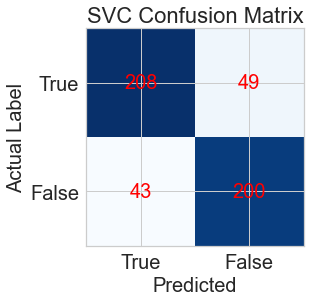

In [346]:
# let's make it look a little better

plt.imshow(confusion_matrix, cmap='Blues')
plt.title('SVC Confusion Matrix', fontsize=22)
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual Label', fontsize=20)

for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        plt.text(j, i, confusion_matrix[i, j], color='red', ha = "center", va = "center", fontsize=20)

plt.xticks([0, 1], ['True', 'False'], fontsize=20)
plt.yticks([0, 1], ['True', 'False'], fontsize=20)
        
plt.show()

The key learning for me is the application of a vectorizor.  This makes it easier for the model to apply the count of words found and their correlation to the category.  Moving forward I would like to utilize the power of pycaret to analyze different models together.  Based on the size and complexity of the dataset, there are likely models that are preferred when classifying things like this.<br>

Additionally, working with text data is quite different that other kinds of data.  nltk is a powerful package and I plan on more projects in this space in the future.<br>

The section below (above references) is just some exploration of the dataset.<br>

### Data exploration

In [347]:
print(len(document))

2000


In [348]:
print(document[:5])

[(['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], 'neg'), (['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], 'neg'), (['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], 'neg'), (['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], 'neg'), (['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], 'neg')]


In [349]:
print(movie_reviews.categories())

['neg', 'pos']


In [350]:
for category in document:
    print(category[1])

neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg
neg


In [351]:
# cats = list(document2)

# for cat in cats:
#     print(cat[1])

In [352]:
target = category[1]

print(target)

pos


In [353]:
cats = [category[1] for category in document]

print(cats)

['neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg'

In [354]:
for data in document:
    print(data[0])

['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...]
['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...]
['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...]
['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...]
['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...]
['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...]
['that', "'", 's', 'exactly', 'how', 'long', 'the', ...]
['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...]
['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...]
['best', 'remembered', 'for', 'his', 'understated', ...]
['janeane', 'garofalo', 'in', 'a', 'romantic', ...]
['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...]
['a', 'movie', 'like', 'mortal', 'kombat', ':', ...]
['she', 'was', 'the', 'femme', 'in', '"', 'la', ...]
['john', 'carpenter', 'makes', 'b', '-', 'movies', '.', ...]
['i', "'", 'm', 'really', 'starting', 'to', 'wonder', ...]
['so', 'what', 'do',

In [355]:
data = [data[0] for data in document]
print(data)

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...], ['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', ...], ['it', 'is', 'movies', 'like', 'these', 'that', 'make', ...], ['"', 'quest', 'for', 'camelot', '"', 'is', 'warner', ...], ['synopsis', ':', 'a', 'mentally', 'unstable', 'man', ...], ['capsule', ':', 'in', '2176', 'on', 'the', 'planet', ...], ['so', 'ask', 'yourself', 'what', '"', '8mm', '"', '(', ...], ['that', "'", 's', 'exactly', 'how', 'long', 'the', ...], ['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...], ['plot', ':', 'a', 'young', 'french', 'boy', 'sees', ...], ['best', 'remembered', 'for', 'his', 'understated', ...], ['janeane', 'garofalo', 'in', 'a', 'romantic', ...], ['and', 'now', 'the', 'high', '-', 'flying', 'hong', ...], ['a', 'movie', 'like', 'mortal', 'kombat', ':', ...], ['she', 'was', 'the', 'femme', 'in', '"', 'la', ...], ['john', 'carpenter', 'makes', 'b', '-', 'movies', '.', ...], ['i', "'", 'm', 'really', 'starting', 'to', 'wonder', ...], ['

In [356]:
# turn this into a dataframe to make it easier to work with

df = pd.DataFrame(document, columns = ['text', 'category'])

print(df)

                                                   text category
0     (plot, :, two, teen, couples, go, to, a, churc...      neg
1     (the, happy, bastard, ', s, quick, movie, revi...      neg
2     (it, is, movies, like, these, that, make, a, j...      neg
3     (", quest, for, camelot, ", is, warner, bros, ...      neg
4     (synopsis, :, a, mentally, unstable, man, unde...      neg
...                                                 ...      ...
1995  (wow, !, what, a, movie, ., it, ', s, everythi...      pos
1996  (richard, gere, can, be, a, commanding, actor,...      pos
1997  (glory, --, starring, matthew, broderick, ,, d...      pos
1998  (steven, spielberg, ', s, second, epic, film, ...      pos
1999  (truman, (, ", true, -, man, ", ), burbank, is...      pos

[2000 rows x 2 columns]


In [357]:
print(df.dtypes)
print(df.shape)

text        object
category    object
dtype: object
(2000, 2)


In [358]:
# try to convert "text" column to strings

df['text'] = df['text'].astype('string')
print(df.dtypes)

text        string
category    object
dtype: object


In [359]:
# for manual preprocessing, I would change 'neg' to 0 and 'pos' to 1

df['category'] = df['category'].replace({'neg': 0, 'pos': 1})
print(df.head(5))
print(df.shape)

                                                text  category
0  ['plot', ':', 'two', 'teen', 'couples', 'go', ...         0
1  ['the', 'happy', 'bastard', "'", 's', 'quick',...         0
2  ['it', 'is', 'movies', 'like', 'these', 'that'...         0
3  ['"', 'quest', 'for', 'camelot', '"', 'is', 'w...         0
4  ['synopsis', ':', 'a', 'mentally', 'unstable',...         0
(2000, 2)


In [360]:
# i typically split these, similar to train/test/split step, but just to keep the target distinct

dftest = df['text']
print(dftest.head(5))
print(dftest.shape)

0    ['plot', ':', 'two', 'teen', 'couples', 'go', ...
1    ['the', 'happy', 'bastard', "'", 's', 'quick',...
2    ['it', 'is', 'movies', 'like', 'these', 'that'...
3    ['"', 'quest', 'for', 'camelot', '"', 'is', 'w...
4    ['synopsis', ':', 'a', 'mentally', 'unstable',...
Name: text, dtype: string
(2000,)


In [361]:
# continuing for target

dftarget = df['category']
print(dftarget.head(5))
print(dftarget.shape)

0    0
1    0
2    0
3    0
4    0
Name: category, dtype: int64
(2000,)


NOTE: pycaret automatically applies tokenization and lemmatization (from above) for NLP/text based analysis.  By default, these are applied without another other action during the setup step with pycaret (from http://www.pycaret.org/tutorials/html/NLP101.html):

Removing Numeric Characters: All numeric characters are removed from the text. They are replaced with blanks.

Removing Special Characters: All non-alphanumeric special characters are removed from the text. They are also replaced with blanks.

Word Tokenization: Word tokenization is the process of splitting a large sample of text into words. This is the core requirement in natural language processing tasks where each word needs to be captured separately for further analysis. Read More

Stopword Removal: A stop word (or stopword) is a word that is often removed from text because it is common and provides little value for information retrieval, even though it might be linguistically meaningful. Example of such words in english language are: "the", "a", "an", "in" etc. Read More

Bigram Extraction: A bigram is a sequence of two adjacent elements from a string of tokens, which are typically letters, syllables, or words. For example: word New York is captured as two different words "New" and "York" when tokenization is performed but if it is repeated enough times, Bigram Extraction will represent the word as one i.e. "New_York" Read More

Trigram Extraction: Similar to bigram extraction, trigram is a sequence of three adjacent elements from a string of tokens. Read More

Lemmatizing: Lemmatization is the process of grouping together the inflected forms of a word so they can be analysed as a single word, identified by the word's lemma, or dictionary form. In English language, word appears in several inflected forms. For example the verb 'to walk' may appear as 'walk', 'walked', 'walks', 'walking'. The base form, 'walk', that one might look up in a dictionary, is called the lemma for the word. Read More

Custom Stopwords: Many times text contains words that are not stopwords by the rule of language but they add no or very little information. For example, in this tutorial we are using the loan dataset. As such, words like "loan", "bank", "money", "business" are too obvious and adds no value. More often than not, they also add a lot of noise in the topic model. You can remove those words from corpus by using custom_stopwords parameter. In next tutorial, Natural Language Processing Tutorial (NLP102) - Level Intermediate we will demonstrate the use of custom_stopwords parameter inside setup().

In [362]:
# new column for tokenized text

df['tokenized_text'] = df['text'].apply(word_tokenize)

In [363]:
# new column for lemmatized text

lemmatizer = WordNetLemmatizer()
df['lemmatized_text'] = df['tokenized_text'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [364]:
print(df.head(5))

                                                text  category  \
0  ['plot', ':', 'two', 'teen', 'couples', 'go', ...         0   
1  ['the', 'happy', 'bastard', "'", 's', 'quick',...         0   
2  ['it', 'is', 'movies', 'like', 'these', 'that'...         0   
3  ['"', 'quest', 'for', 'camelot', '"', 'is', 'w...         0   
4  ['synopsis', ':', 'a', 'mentally', 'unstable',...         0   

                                      tokenized_text  \
0  [[, 'plot, ', ,, ', :, ', ,, 'two, ', ,, 'teen...   
1  [[, 'the, ', ,, 'happy, ', ,, 'bastard, ', ,, ...   
2  [[, 'it, ', ,, 'is, ', ,, 'movies, ', ,, 'like...   
3  [[, ', '', ', ,, 'quest, ', ,, 'for, ', ,, 'ca...   
4  [[, 'synopsis, ', ,, ', :, ', ,, ', a, ', ,, '...   

                                     lemmatized_text  
0  [[, 'plot, ', ,, ', :, ', ,, 'two, ', ,, 'teen...  
1  [[, 'the, ', ,, 'happy, ', ,, 'bastard, ', ,, ...  
2  [[, 'it, ', ,, 'is, ', ,, 'movies, ', ,, 'like...  
3  [[, ', '', ', ,, 'quest, ', ,, 'for, ', ,, 

In [365]:
# create variables

# Xdata = df.drop(['category', 'text'], axis = 1)  # getting rid of text column to help with dtype float conversion
Xdata = df.drop('category', axis = 1)  # float conversion in progress
target = df['category']  # changes this to a list to use with train/test/split

In [366]:
print(Xdata.head(5))
print(target.head(5))

                                                text  \
0  ['plot', ':', 'two', 'teen', 'couples', 'go', ...   
1  ['the', 'happy', 'bastard', "'", 's', 'quick',...   
2  ['it', 'is', 'movies', 'like', 'these', 'that'...   
3  ['"', 'quest', 'for', 'camelot', '"', 'is', 'w...   
4  ['synopsis', ':', 'a', 'mentally', 'unstable',...   

                                      tokenized_text  \
0  [[, 'plot, ', ,, ', :, ', ,, 'two, ', ,, 'teen...   
1  [[, 'the, ', ,, 'happy, ', ,, 'bastard, ', ,, ...   
2  [[, 'it, ', ,, 'is, ', ,, 'movies, ', ,, 'like...   
3  [[, ', '', ', ,, 'quest, ', ,, 'for, ', ,, 'ca...   
4  [[, 'synopsis, ', ,, ', :, ', ,, ', a, ', ,, '...   

                                     lemmatized_text  
0  [[, 'plot, ', ,, ', :, ', ,, 'two, ', ,, 'teen...  
1  [[, 'the, ', ,, 'happy, ', ,, 'bastard, ', ,, ...  
2  [[, 'it, ', ,, 'is, ', ,, 'movies, ', ,, 'like...  
3  [[, ', '', ', ,, 'quest, ', ,, 'for, ', ,, 'ca...  
4  [[, 'synopsis, ', ,, ', :, ', ,, ', a, ', ,, '..

References:<br>
https://medium.com/@joel_34096/sentiment-analysis-of-movie-reviews-in-nltk-python-4af4b76a6f3<br>
https://www.nltk.org/py-modindex.html#cap-m<br>
https://levelup.gitconnected.com/how-3-personal-data-science-projects-helped-me-land-5-job-interviews-49d2b3ef648e<br>